<a href="https://colab.research.google.com/github/RheyMartt/CCMACLRL_EXERCISE_COM222ML/blob/main/Exercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 9: Choosing the best performing model on a dataset

Instructions:

- Use the Dataset File to train your model
- Use the Test File to generate your results
- Use the Sample Submission file to generate the same format
- Use all classification models

Submit your results to:
https://www.kaggle.com/competitions/playground-series-s4e10/overview



In [233]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Dataset File

In [234]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/main/datasets/loan_approval/train.csv?raw=true'
df = pd.read_csv(dataset_url)

## Test File

In [235]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/main/datasets/loan_approval/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [236]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


## Sample Submission File

In [237]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES/blob/main/datasets/loan_approval/sample_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [238]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           39098 non-null  int64  
 1   loan_status  39098 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 611.0 KB


In [239]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [240]:
df.tail()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0
58644,58644,31,75000,MORTGAGE,2.0,VENTURE,B,15000,11.11,0.20,N,5,0


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [242]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

# 2. Create a LabelEncoder for each categorical column:
encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    # Convert the column to string type before fitting the encoder
    all_values = pd.concat([df[col].astype(str), X_test[col].astype(str)]).unique()
    encoders[col].fit(all_values)
    df[col] = encoders[col].transform(df[col].astype(str)) # Convert to string during transform as well

In [243]:
# prompt: do my previous code on the dt dataset:
# categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
# # 2. Create a LabelEncoder for each categorical column:
# encoders = {}
# for col in categorical_cols:
#     encoders[col] = LabelEncoder()
#     # Convert the column to string type before fitting the encoder
#     all_values = pd.concat([df[col].astype(str), X_test[col].astype(str)]).unique()
#     encoders[col].fit(all_values)
#     df[col] = encoders[col].transform(df[col].astype(str)) # Convert to string during transform as well

categorical_cols = [col for col in dt.columns if dt[col].dtype == 'object']
# 2. Create a LabelEncoder for each categorical column:
encoders_dt = {}
for col in categorical_cols:
    encoders_dt[col] = LabelEncoder()
    # Convert the column to string type before fitting the encoder
    all_values = pd.concat([df[col].astype(str), dt[col].astype(str)]).unique()
    encoders_dt[col].fit(all_values)
    dt[col] = encoders_dt[col].transform(dt[col].astype(str)) # Convert to string during transform as well

In [244]:
X = df.drop(['id','loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
dt.shape

(39098, 12)

In [246]:
dt = dt.drop(['id'], axis=1)

## 1. Train a KNN Classifier

In [247]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)
knn_score = KNN.score(X_test, y_test)
print("KNN Score:", knn_score)
print(f"Score is {knn_score}")

KNN Score: 0.8935970670986444
Score is 0.8935970670986444


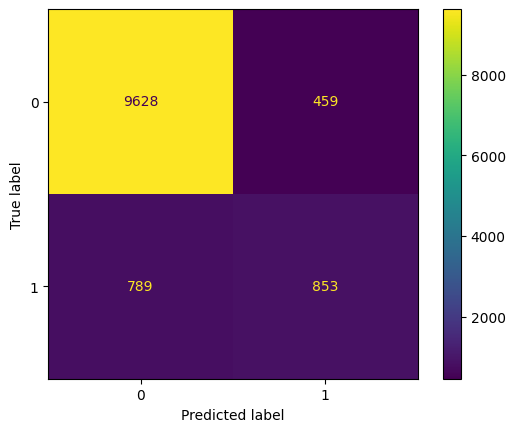

In [248]:
y_true = y_test
y_pred = KNN.predict(X_test)
cmconf = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cmconf, display_labels=['0', '1'])
disp.plot()
plt.show()

- Perform cross validation

In [249]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)

cv_scores = cross_val_score(knn, X, y, cv=5)


print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.89197715 0.89240344 0.89444965 0.89086879 0.89300026]
Average Cross-Validation Score: 0.8925398584704578


## 2. Train a Logistic Regression Classifier

In [250]:
LR = LogisticRegression()

LR.fit(X_train, y_train)
lr_score = LR.score(X_test, y_test)
print("Logistic Regression Score:", lr_score)
print(f"Score is {lr_score}")

Logistic Regression Score: 0.8814903231307016
Score is 0.8814903231307016


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


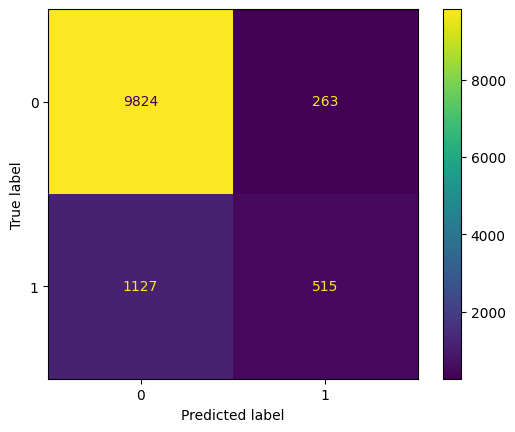

In [251]:
y_pred = LR.predict(X_test)
LRconf = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=LRconf, display_labels=['0', '1'])
disp.plot()
plt.show()

- Perform cross validation

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


linear_regression = LinearRegression()


cv_scores = cross_val_score(linear_regression, X, y, cv=5)

print("Cross-Validation Scores for Linear Regression:", cv_scores)
print("Average Cross-Validation Score for Linear Regression:", cv_scores.mean())

Cross-Validation Scores for Linear Regression: [0.28613587 0.28086527 0.29264305 0.29317416 0.28675853]
Average Cross-Validation Score for Linear Regression: 0.2879153779435554


## 3. Train a Naive Bayes Classifier

In [253]:
nbc = GaussianNB()

nbc.fit(X_train, y_train)
nbc_score = nbc.score(X_test, y_test)
print("Naive Bayes Score:", nbc_score)
print(f"Score is {nbc_score}")

Naive Bayes Score: 0.8823429107340779
Score is 0.8823429107340779


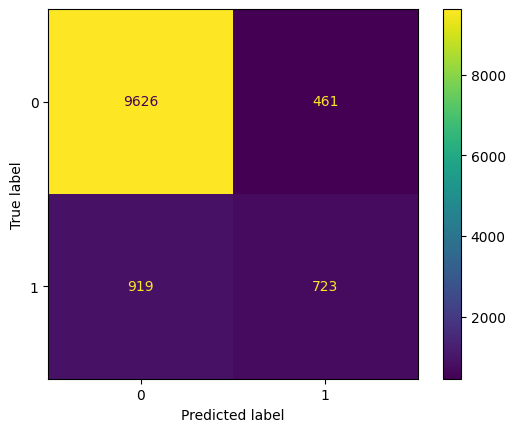

In [254]:
y_true = y_test
y_pred = nbc.predict(X_test)
nbconf = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=nbconf, display_labels=['0', '1'])
disp.plot()
plt.show()

- Perform cross validation

In [255]:
nbc = GaussianNB()

cv_scores = cross_val_score(nbc, X, y, cv=5)

print("Cross-Validation Scores for Naive Bayes:", cv_scores)
print("Average Cross-Validation Score for Naive Bayes:", cv_scores.mean())

Cross-Validation Scores for Naive Bayes: [0.87876204 0.88149032 0.88302498 0.88242817 0.88370705]
Average Cross-Validation Score for Naive Bayes: 0.8818825134282546


## 4. Train a SVM Classifier

In [256]:
svc = SVC()

svc.fit(X_train, y_train)
svc_score = svc.score(X_test, y_test)
print("SVM Score:", svc_score)
print(f"Score is {svc_score}")

SVM Score: 0.8600051155256203
Score is 0.8600051155256203


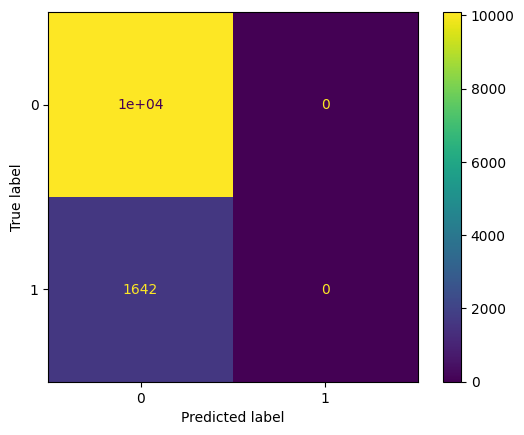

In [257]:
y_true = y_test
y_pred = svc.predict(X_test)
svconf = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=svconf, display_labels=['0', '1'])
disp.plot()

- Perform cross validation

In [258]:
svm = SVC()

cv_scores = cross_val_score(svm, X, y, cv=5)

print("Cross-Validation Scores for SVM:", cv_scores)
print("Average Cross-Validation Score for SVM:", cv_scores.mean())

Cross-Validation Scores for SVM: [0.85761787 0.85761787 0.85761787 0.85753261 0.85761787]
Average Cross-Validation Score for SVM: 0.8576008184840992


## 5. Train a Decision Tree Classifier

In [259]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
dtc_score = dtc.score(X_test, y_test)
print("Decision Tree Score:", dtc_score)
print(f"Score is {dtc_score}")

Decision Tree Score: 0.9113308892488703
Score is 0.9113308892488703


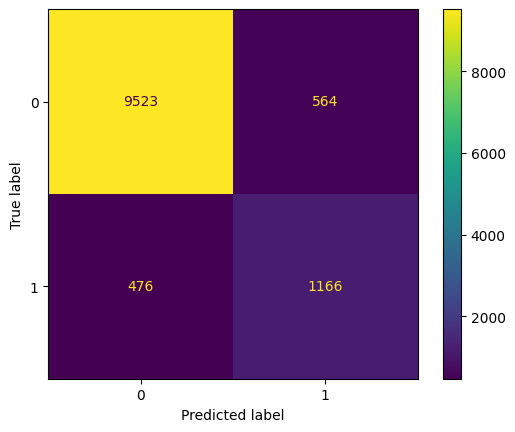

In [260]:
y_true = y_test
y_pred = dtc.predict(X_test)
dtconf = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=dtconf, display_labels=['0', '1'])
disp.plot()

- Perform cross validation

In [261]:
dtc = DecisionTreeClassifier()

cv_scores = cross_val_score(dtc, X, y, cv=5)

print("Cross-Validation Scores for Decision Tree:", cv_scores)
print("Average Cross-Validation Score for Decision Tree:", cv_scores.mean())

Cross-Validation Scores for Decision Tree: [0.91039304 0.90502174 0.9109046  0.91414443 0.91422969]
Average Cross-Validation Score for Decision Tree: 0.9109386989513173


## 6. Train a Random Forest Classifier

In [262]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
rfc_score = rfc.score(X_test, y_test)
print("Random Forest Score:", rfc_score)
print(f"Score is {rfc_score}")

Random Forest Score: 0.949100520078438
Score is 0.949100520078438


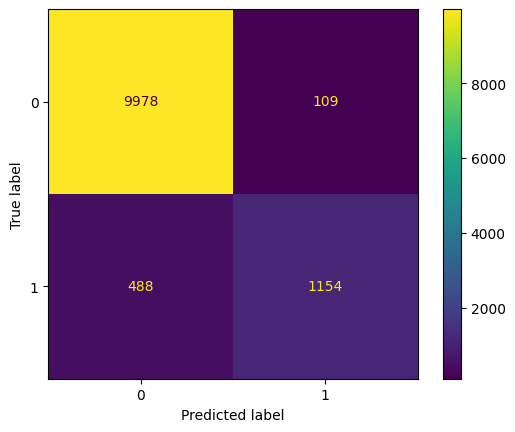

In [263]:
y_true = y_test
y_pred = rfc.predict(X_test)
rfconf = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=rfconf, display_labels=['0', '1'])
disp.plot()

## 7. Compare all the performance of all classification models

In [264]:
score_list = [knn_score, lr_score, nbc_score, svc_score, dtc_score, rfc_score]

for i, score in enumerate(score_list):
    print(f"Model {i+1} Score: {score}")

Model 1 Score: 0.8935970670986444
Model 2 Score: 0.8814903231307016
Model 3 Score: 0.8823429107340779
Model 4 Score: 0.8600051155256203
Model 5 Score: 0.9113308892488703
Model 6 Score: 0.949100520078438


## 9. Generate Submission File

Choose the model that has the best performance to generate a submission file.

In [265]:
id = sf.pop('id')
y_pred = rfc.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'loan_status': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
